In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

train = pd.read_csv('Data/train.csv')
test = pd.read_csv('Data/test.csv')
sample_sub = pd.read_csv('Data/sample_submission_q0Q3I1Z.csv')

alldata = pd.concat([train,test])
alldata['datetime'] = pd.to_datetime(alldata['datetime'])

alldata['Day'] = alldata['datetime'].dt.day
alldata['DOW'] = alldata['datetime'].dt.dayofweek
alldata['Year'] = alldata['datetime'].dt.year
alldata['Month'] = alldata['datetime'].dt.month
# alldata['Date'] = alldata['datetime'].dt.date
alldata['Hour'] = alldata['datetime'].dt.hour

In [53]:
# alldata['DOY'] = alldata['datetime'].dt.dayofyear
# alldata['Week'] = alldata['datetime'].dt.week

In [54]:
alldata.head()

,ID,datetime,electricity_consumption,pressure,temperature,var1,var2,windspeed,Day,DOW,Year,Month,Hour
0,0,2013-07-01 00:00:00,216.0,1003.0,-11.4,-17.1,A,571.910,1,0,2013,7,0
1,1,2013-07-01 01:00:00,210.0,996.0,-12.1,-19.3,A,575.040,1,0,2013,7,1
2,2,2013-07-01 02:00:00,225.0,1000.0,-12.9,-20.0,A,578.435,1,0,2013,7,2
3,3,2013-07-01 03:00:00,216.0,995.0,-11.4,-17.1,A,582.580,1,0,2013,7,3
4,4,2013-07-01 04:00:00,222.0,1005.0,-11.4,-19.3,A,586.600,1,0,2013,7,4


In [55]:
temp = alldata.groupby(['DOW','Hour'], as_index=False)['electricity_consumption'].max().rename(columns={'electricity_consumption':'max_electricity_consumption'})
alldata = pd.merge(alldata, temp, how='left', on=['DOW','Hour']) 


temp = alldata.groupby(['Hour','DOW'], as_index=False)['pressure'].min().rename(columns={'pressure':'min_pressure'})
alldata = pd.merge(alldata, temp, how='left', on=['DOW','Hour']) 

temp = alldata.groupby(['DOW','Hour'], as_index=False)['pressure'].mean().rename(columns={'pressure':'mean_pressure'})
alldata = pd.merge(alldata, temp, how='left', on=['DOW','Hour']) 

temp = alldata.groupby(['DOW','Hour'], as_index=False)['pressure'].max().rename(columns={'pressure':'max_pressure'})
alldata = pd.merge(alldata, temp, how='left', on=['DOW','Hour']) 


temp = alldata.groupby(['Hour','DOW'], as_index=False)['windspeed'].min().rename(columns={'windspeed':'min_windspeed'})
alldata = pd.merge(alldata, temp, how='left', on=['DOW','Hour']) 

temp = alldata.groupby(['DOW','Hour'], as_index=False)['windspeed'].mean().rename(columns={'windspeed':'mean_windspeed'})
alldata = pd.merge(alldata, temp, how='left', on=['DOW','Hour']) 

temp = alldata.groupby(['DOW','Hour'], as_index=False)['windspeed'].max().rename(columns={'windspeed':'max_windspeed'})
alldata = pd.merge(alldata, temp, how='left', on=['DOW','Hour']) 


temp = alldata.groupby(['Hour','DOW'], as_index=False)['temperature'].min().rename(columns={'temperature':'min_temperature'})
alldata = pd.merge(alldata, temp, how='left', on=['DOW','Hour']) 

temp = alldata.groupby(['DOW','Hour'], as_index=False)['temperature'].mean().rename(columns={'temperature':'mean_temperature'})
alldata = pd.merge(alldata, temp, how='left', on=['DOW','Hour']) 

temp = alldata.groupby(['DOW','Hour'], as_index=False)['temperature'].max().rename(columns={'temperature':'max_temperature'})
alldata = pd.merge(alldata, temp, how='left', on=['DOW','Hour']) 


temp = alldata.groupby(['Hour','DOW'], as_index=False)['var1'].min().rename(columns={'var1':'min_var1_temperature'})
alldata = pd.merge(alldata, temp, how='left', on=['DOW','Hour']) 

temp = alldata.groupby(['DOW','Hour'], as_index=False)['var1'].mean().rename(columns={'var1':'mean_var1_temperature'})
alldata = pd.merge(alldata, temp, how='left', on=['DOW','Hour']) 

temp = alldata.groupby(['DOW','Hour'], as_index=False)['var1'].max().rename(columns={'var1':'max_var1_temperature'})
alldata = pd.merge(alldata, temp, how='left', on=['DOW','Hour']) 

In [56]:
def DayTimes(Hour):
    if Hour in range(0,5):
        return "MidNight"
    elif Hour in range(5,7):
        return "Morning"
    elif Hour in range(7,17):
        return "Afternoon"
    elif Hour in range(17,24):
        return "Night"
    
def Weekend(DOW):
    if DOW in [0,5,6]:
        return 1
    else:
        return 0

In [57]:
alldata['DayTime'] = alldata['Hour'].apply(DayTimes)
alldata['WeekendFlag'] = alldata['DOW'].apply(Weekend)
alldata['Holiday'] = alldata.DOW > 5

In [58]:
alldata['VAR_TEMP'] = alldata['var1']/ alldata['temperature']
alldata['VAR_PRE'] = alldata['var1'] / alldata['pressure']
alldata['VAR_WIN'] = alldata['var1']/ alldata['windspeed']
# 
alldata['INV_VAR_TEMP'] = alldata['temperature'] /alldata['var1']
alldata['INV_VAR_PRE'] =  alldata['pressure']/alldata['var1']
alldata['INV_VAR_WIN'] = alldata['windspeed']/alldata['var1']

In [59]:
alldata.drop('var1', axis=1, inplace=True)

In [60]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
alldata['var2'] = encoder.fit_transform(alldata['var2'])
# alldata['Date'] = encoder.fit_transform(alldata['Date'])

alldata['DayTime'] = encoder.fit_transform(alldata['DayTime'])

In [61]:
alldata.columns

Index(['ID', 'datetime', 'electricity_consumption', 'pressure', 'temperature',
       'var2', 'windspeed', 'Day', 'DOW', 'Year', 'Month', 'Hour',
       'max_electricity_consumption', 'min_pressure', 'mean_pressure',
       'max_pressure', 'min_windspeed', 'mean_windspeed', 'max_windspeed',
       'min_temperature', 'mean_temperature', 'max_temperature',
       'min_var1_temperature', 'mean_var1_temperature', 'max_var1_temperature',
       'DayTime', 'WeekendFlag', 'Holiday', 'VAR_TEMP', 'VAR_PRE', 'VAR_WIN',
       'INV_VAR_TEMP', 'INV_VAR_PRE', 'INV_VAR_WIN'],
      dtype='object')

In [62]:
cols_to_drop = ['datetime', 'ID']
alldata.drop(cols_to_drop, axis=1,inplace=True)

In [63]:
train_feats = alldata[~pd.isnull(alldata.electricity_consumption)]
test_feats = alldata[pd.isnull(alldata.electricity_consumption)]

In [64]:
X_TEST_RAW = test_feats.copy()
X_TRAIN_RAW = train_feats.copy()

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [66]:
from lightgbm import LGBMRegressor
from math import sqrt
def RMSE(y_actual, preds, log = False):
    if log:
        RMSE = sqrt(mean_squared_error(y_actual, np.expm1(preds)))
    else:
        RMSE = sqrt(mean_squared_error(y_actual, preds))
    return RMSE

In [67]:
# GradientBoostingRegressor() 
# 95 LB
# XGBRegressor() 95.2392449986971

In [68]:
def LOCAL_TEST():
    n = 10
    YEAR_LIST = [2013, 2014, 2015, 2016, 2017]
    for year in YEAR_LIST:
        print ("Predicting for the year...", year)
        Month_RMSE = []
        for month in set(X_TRAIN_RAW['Month']):
            YR = year
            if year == 2013:
                M = 7
                while M <= 12:
                    X_train = X_TRAIN_RAW[(X_TRAIN_RAW['Day'] <= n) & (X_TRAIN_RAW['Month'] <= M) & (X_TRAIN_RAW['Year'] <= YR) ].drop('electricity_consumption', axis=1)
                    y_train = X_TRAIN_RAW[(X_TRAIN_RAW['Day'] <= n) & (X_TRAIN_RAW['Month'] <= M) & (X_TRAIN_RAW['Year'] <= YR) ].electricity_consumption

                    X_test = X_TRAIN_RAW[(X_TRAIN_RAW['Day'] > n) & (X_TRAIN_RAW['Month'] <= M) & (X_TRAIN_RAW['Year'] <= YR) ].drop('electricity_consumption', axis=1)
                    y_test = X_TRAIN_RAW[(X_TRAIN_RAW['Day'] > n) & (X_TRAIN_RAW['Month'] <= M) & (X_TRAIN_RAW['Year'] <= YR) ].electricity_consumption


                    X_train = X_train[cols]
            
                    light.fit(X_train, np.log1p(y_train))
                    pred = light.predict(X_test[cols])

                    Month_RMSE.append(RMSE(y_test, pred, log=True))
                    M = M + 1
            else:
                
                M= month

                X_train = X_TRAIN_RAW[(X_TRAIN_RAW['Day'] <= n) & (X_TRAIN_RAW['Month'] <= M) & (X_TRAIN_RAW['Year'] <= YR) ].drop('electricity_consumption', axis=1)
                y_train = X_TRAIN_RAW[(X_TRAIN_RAW['Day'] <= n) & (X_TRAIN_RAW['Month'] <= M) & (X_TRAIN_RAW['Year'] <= YR) ].electricity_consumption

                X_test = X_TRAIN_RAW[(X_TRAIN_RAW['Day'] > n) & (X_TRAIN_RAW['Month'] <= M) & (X_TRAIN_RAW['Year'] <= YR) ].drop('electricity_consumption', axis=1)
                y_test = X_TRAIN_RAW[(X_TRAIN_RAW['Day'] > n) & (X_TRAIN_RAW['Month'] <= M) & (X_TRAIN_RAW['Year'] <= YR) ].electricity_consumption

                X_train = X_train[cols]

                light.fit(X_train, np.log1p(y_train))
                pred = light.predict(X_test[cols])

                Month_RMSE.append(RMSE(y_test, pred, log=True))
        print (np.mean(Month_RMSE))

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import LinearSVR
from sklearn.neural_network import MLPRegressor

In [83]:
cols = ['pressure', 
        
        'temperature', 'var2',
        
       'windspeed', 
        
        'Day', 
        
        'DOW', 
        'Year',
        
        'Month',
        
        'Hour',
       'max_electricity_consumption',
        
        'min_pressure',
        
        'mean_pressure',
        
       'max_pressure', 
        
        'min_windspeed', 
        
        'mean_windspeed', 'max_windspeed',
       'min_temperature', 'mean_temperature', 'max_temperature',
        
       'min_var1_temperature', 'mean_var1_temperature', 'max_var1_temperature',
       'DayTime',  'Holiday', 'VAR_TEMP', 'VAR_PRE', 'VAR_WIN',
       'INV_VAR_TEMP', 'INV_VAR_PRE', 'INV_VAR_WIN'
       
       ]

In [139]:
light =  XGBRegressor(n_estimators=99, min_child_weight= 2)

In [140]:
LOCAL_TEST()

Predicting for the year... 2013
117.54318228129335
Predicting for the year... 2014
105.33196612128567
Predicting for the year... 2015
100.03398373702157
Predicting for the year... 2016
92.47414456364476
Predicting for the year... 2017
87.85942954468449


In [141]:
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot

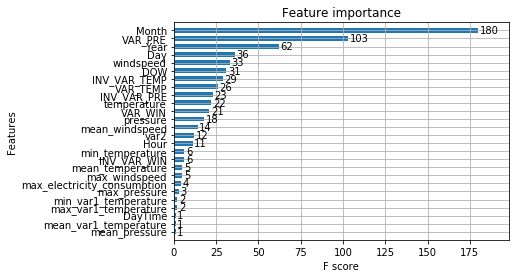

In [142]:
plot_importance(light, height=.6)

In [143]:
# pd.DataFrame({'Feats': X_TRAIN_RAW.drop('electricity_consumption', axis=1).columns, 'IMP': light.feature_importances_}).sort_values(by="IMP", ascending=0)

In [158]:
X_TRAIN_RAW.fillna(-1, inplace=True)
X_TEST_RAW.fillna(-1, inplace=True)

In [196]:
def TIME_MACHINE():
    pd.options.mode.chained_assignment = None  # default='warn'
    n = 23
    GENERATED_TEST  = pd.DataFrame()
    YEAR_LIST = [2013, 2014, 2015, 2016, 2017]
    for year in YEAR_LIST:
        print ("Predicting for the year:", year)
        for month in (set(X_TRAIN_RAW['Month'])):
            YR = year
            
            if year == 2013:
                M = 7
                while M <= 12:
                    X  = X_TRAIN_RAW[(X_TRAIN_RAW['Day'] <= n) & (X_TRAIN_RAW['Month'] <= M) & (X_TRAIN_RAW['Year'] <= YR) ].drop('electricity_consumption', axis=1)
                    y = X_TRAIN_RAW[(X_TRAIN_RAW['Day'] <= n) & (X_TRAIN_RAW['Month'] <= M) & (X_TRAIN_RAW['Year'] <= YR) ].electricity_consumption
                    X_TEST  = X_TEST_RAW[(X_TEST_RAW['Day'] > 23 ) & (X_TEST_RAW['Month'] <= M) & (X_TEST_RAW['Year'] <= YR) ].drop('electricity_consumption', axis=1)          
                    
                    
                    X = X[cols]
                    
                    light.fit(X, np.log1p(y))
                    pred = light.predict(X_TEST[cols])
                    X_TEST['electricity_consumption'] = pred
                    GENERATED_TEST = pd.concat([GENERATED_TEST,X_TEST])   
                    M = M + 1
            else: 
                M = month

                  
                X = X_TRAIN_RAW[(X_TRAIN_RAW['Day'] < n) & (X_TRAIN_RAW['Month'] <= M) & (X_TRAIN_RAW['Year'] <= YR) ].drop('electricity_consumption', axis=1)
                y = X_TRAIN_RAW[(X_TRAIN_RAW['Day'] < n) & (X_TRAIN_RAW['Month'] <= M) & (X_TRAIN_RAW['Year'] <= YR) ].electricity_consumption

                X_TEST  = X_TEST_RAW[(X_TEST_RAW['Day'] > 23 ) & (X_TEST_RAW['Month'] <= M) & (X_TEST_RAW['Year'] <= YR) ].drop('electricity_consumption', axis=1)

                X = X[cols]

                light.fit(X, np.log1p(y))
                pred = light.predict(X_TEST[cols])
                X_TEST['electricity_consumption'] = pred
                GENERATED_TEST = pd.concat([GENERATED_TEST,X_TEST])
                
    GENt = GENERATED_TEST[['Year', 'Day','Month', 'Hour','DOW','electricity_consumption']]
    test_feats['ID'] = test['ID'].values
    REAL_PREDS = pd.merge(GENt,test_feats , on=['Year','Day', 'Month', 'Hour', 'DOW'])
    REAL_PREDS = REAL_PREDS[['electricity_consumption_x','ID']].sort_values(by='ID', ascending=1).rename(columns={
    'electricity_consumption_x':'electricity_consumption'})[['ID','electricity_consumption']]
    PREDS =  np.expm1(REAL_PREDS['electricity_consumption']).values
    REAL_PREDS['electricity_consumption'] = PREDS
    return PREDS,REAL_PREDS

In [145]:
pred, sub = TIME_MACHINE()

Predicting for the year: 2013
Predicting for the year: 2014
Predicting for the year: 2015
Predicting for the year: 2016
Predicting for the year: 2017


In [160]:
from sklearn.neighbors import KNeighborsRegressor

In [161]:
light = XGBRegressor()
pred1, sub = TIME_MACHINE()

light = LGBMRegressor()
pred2, sub = TIME_MACHINE()


Predicting for the year: 2013
Predicting for the year: 2014
Predicting for the year: 2015
Predicting for the year: 2016
Predicting for the year: 2017
Predicting for the year: 2013
Predicting for the year: 2014
Predicting for the year: 2015
Predicting for the year: 2016
Predicting for the year: 2017
Predicting for the year: 2013


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [197]:
light = GradientBoostingRegressor()
pred3, sub = TIME_MACHINE()

Predicting for the year: 2013


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [190]:
pred = (3 * pred1 + 4* pred2) / 7

In [191]:
sub['electricity_consumption'] = pred

In [192]:
sub.head()

,ID,electricity_consumption
0,552,212.563904
69,552,226.713700
68,552,227.941965
67,552,222.407881
66,552,212.563904


In [193]:
sub.to_csv('VAR2344.csv', index=None)